In [1]:
%matplotlib inline
import importlib
import nn
importlib.reload(nn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nn import NeuralNetwork
from sklearn.metrics import accuracy_score, f1_score

In [7]:
data_rings3_train = pd.read_csv("dane_nn5/rings3-regular-training.csv")
X_rings3_train = data_rings3_train[['x', 'y']].values.reshape(-1, 2)
y_rings3_train = data_rings3_train['c'].values.reshape(-1, 1)

data_rings3_test = pd.read_csv("dane_nn5/rings3-regular-test.csv")
X_rings3_test = data_rings3_test[['x', 'y']].values.reshape(-1, 2)
y_rings3_test = data_rings3_test['c'].values.reshape(-1, 1)

data_rings5_train = pd.read_csv("dane_nn5/rings5-regular-training.csv")
X_rings5_train = data_rings5_train[['x', 'y']].values.reshape(-1, 2)
y_rings5_train = data_rings5_train['c'].values.reshape(-1, 1)

data_rings5_test = pd.read_csv("dane_nn5/rings5-regular-test.csv")
X_rings5_test = data_rings5_test[['x', 'y']].values.reshape(-1, 2)
y_rings5_test = data_rings5_test['c'].values.reshape(-1, 1)

data_multimodal_train = pd.read_csv("dane_nn5/multimodal-large-training.csv")
X_multimodal_train = data_multimodal_train[['x']].values.reshape(-1, 1) 
y_multimodal_train = data_multimodal_train['y'].values.reshape(-1, 1)

data_multimodal_test = pd.read_csv("dane_nn5/multimodal-large-test.csv")
X_multimodal_test = data_multimodal_test[['x']].values.reshape(-1, 1)
y_multimodal_test = data_multimodal_test['y'].values.reshape(-1, 1)

data_steps_train = pd.read_csv("dane_nn5/steps-large-training.csv")
X_steps_train = data_steps_train[['x']].values.reshape(-1, 1)
y_steps_train = data_steps_train['y'].values.reshape(-1, 1)

data_steps_test = pd.read_csv("dane_nn5/steps-large-test.csv")
X_steps_test = data_steps_test[['x']].values.reshape(-1, 1)
y_steps_test = data_steps_test['y'].values.reshape(-1, 1)


## Multimodal large dataset

In [28]:
nn = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 32, 64, 32, 1],
                   activation_fun="sigmoid", output_activation="linear", loss_fun="mse")

nn.train(epochs=int(1e3), learning_rate=0.01, validation_data=(X_multimodal_test, y_multimodal_test),
         mini_batch=True, batch_size=100, optimization="rmsprop", momentum=0, stop_condition=0.01) 
nn.train(epochs=int(1e3), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
         mini_batch=True, batch_size=100, optimization="rmsprop", momentum=0, stop_condition=0.01)

Starting loss: 5337.59


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [01:06<00:00] , Loss:  Current: 8.9252,Best: 3.2373



Training complete. Final loss: 3.2373
Starting loss: 12.50


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [01:06<00:00] , Loss:  Current: 3.2600,Best: 1.5168


Training complete. Final loss: 1.5168


In [32]:
nn3 = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 32, 64, 32, 1],
                     activation_fun="sigmoid", output_activation="linear", loss_fun="mse")

nn3.train(epochs=int(1e3), learning_rate=0.01, validation_data=(X_multimodal_test, y_multimodal_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0, stop_condition=0.01)
nn3.train(epochs=int(1e3), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0, stop_condition=0.01)

Starting loss: 5362.33


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [01:03<00:00] , Loss:  Current: 8.1280,Best: 6.3047



Training complete. Final loss: 6.3047
Starting loss: 11.57


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00] , Loss:  Current: 1.4163,Best: 1.3590


Training complete. Final loss: 1.3590


In [31]:
nn2 = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 32, 64, 32, 1],
                     activation_fun="sigmoid", output_activation="linear", loss_fun="mse")

nn2.train(epochs=int(1e3), learning_rate=0.01, validation_data=(X_multimodal_test, y_multimodal_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0.6, stop_condition=0.01)
nn2.train(epochs=int(1e3), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0.6, stop_condition=0.01)

Starting loss: 5329.06


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00] , Loss:  Current: 5.2664,Best: 1.9481



Training complete. Final loss: 1.9481
Starting loss: 7.56


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00] , Loss:  Current: 0.0667,Best: 0.0615


Training complete. Final loss: 0.0615


Test MSE for rmsprop: 1.5168
Test MSE for momentum: 0.0615
Test MSE for mini-batch: 1.3590


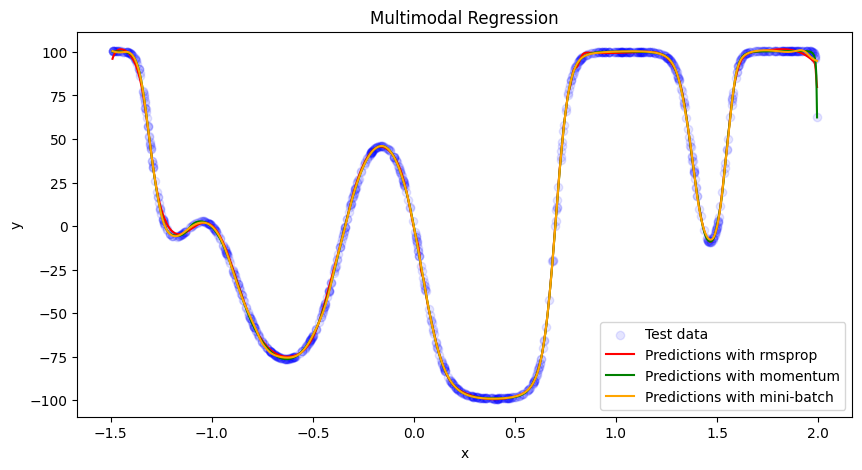

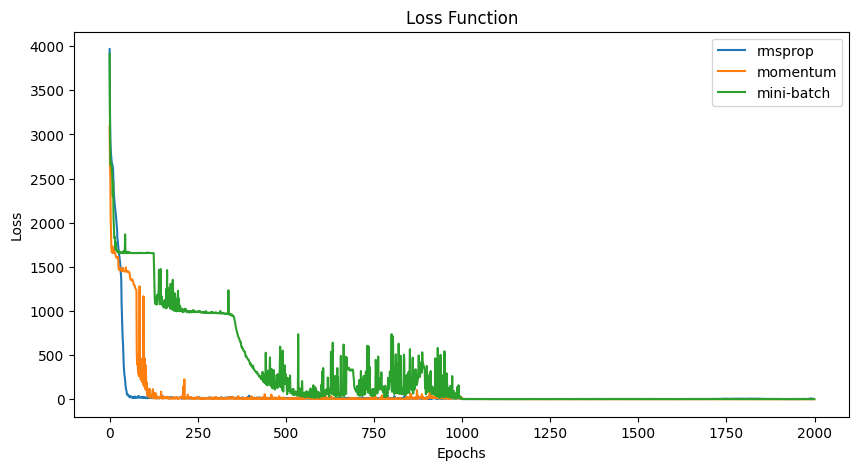

In [35]:
y_pred1 = nn.predict(X_multimodal_test)
y_pred2 = nn2.predict(X_multimodal_test)
y_pred3 = nn3.predict(X_multimodal_test)

mse1 = np.mean((y_multimodal_test - y_pred1) ** 2)
mse2 = np.mean((y_multimodal_test - y_pred2) ** 2)
mse3 = np.mean((y_multimodal_test - y_pred3) ** 2)

print(f"Test MSE for rmsprop: {mse1:.4f}")
print(f"Test MSE for momentum: {mse2:.4f}")
print(f"Test MSE for mini-batch: {mse3:.4f}")

x = np.linspace(np.min(X_multimodal_test), np.max(X_multimodal_test), 1000).reshape(-1, 1)


plt.figure(figsize=(10, 5))
plt.scatter(X_multimodal_test, y_multimodal_test, color='blue', alpha=0.1, label='Test data')
plt.plot(x, nn.predict(x), color='red', label='Predictions with rmsprop')
plt.plot(x, nn2.predict(x), color='green', label='Predictions with momentum')
plt.plot(x, nn3.predict(x), color='orange', label='Predictions with mini-batch')
plt.title('Multimodal Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

loss1 = nn.model_history()
loss2 = nn2.model_history()
loss3 = nn3.model_history()

plt.figure(figsize=(10, 5))
plt.plot(loss1, label='rmsprop')
plt.plot(loss2, label='momentum')
plt.plot(loss3, label='mini-batch')
plt.title('Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
